In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=15_000, n_features=2, n_informative=2, n_redundant=0,
                   n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.05,0.95],
                   class_sep=0.8, random_state=0)

In [7]:
sorted(Counter(y).items())

[(0, 815), (1, 14185)]

In [8]:
X

array([[-2.47330032,  0.56962014],
       [-1.28377649,  0.57697365],
       [ 1.42830164,  0.6296494 ],
       ...,
       [ 0.05372966,  0.30149359],
       [ 2.01972609,  0.30745703],
       [-0.03042093,  1.04492183]])

In [9]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,-2.473300,0.569620,0
1,-1.283776,0.576974,1
2,1.428302,0.629649,1
3,2.071399,1.389588,1
4,1.247005,1.123625,1


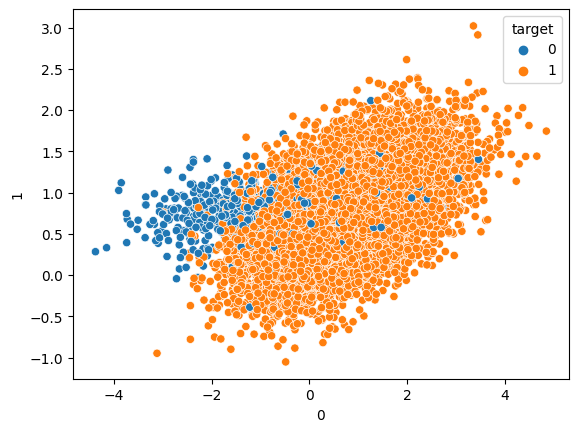

In [13]:
sns.scatterplot(data=df, x=0, y=1, hue='target')
plt.show()

### Resampler with imblearn

#### Clustering

In [14]:
from imblearn.under_sampling import ClusterCentroids

In [15]:
sampler = ClusterCentroids()

In [16]:
X_resample, y_resample = sampler.fit_resample(X,y)

C:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
sorted(Counter(y_resample).items())

[(0, 815), (1, 815)]

In [19]:
df_sampled = pd.DataFrame(X_resample)
df_sampled['target'] = y_resample
df_sampled.head()

,0,1,target
0,-2.473300,0.569620,0
1,-1.655427,1.168923,0
2,-0.012906,0.989231,0
3,-0.841488,0.212281,0
4,1.169471,1.035011,0


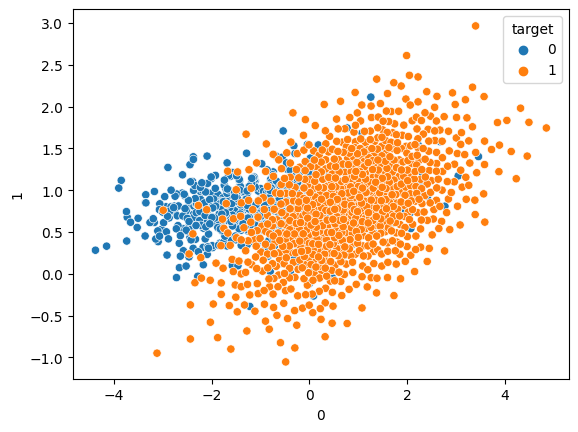

In [20]:
sns.scatterplot(data=df_sampled, x=0, y=1, hue='target')
plt.show()

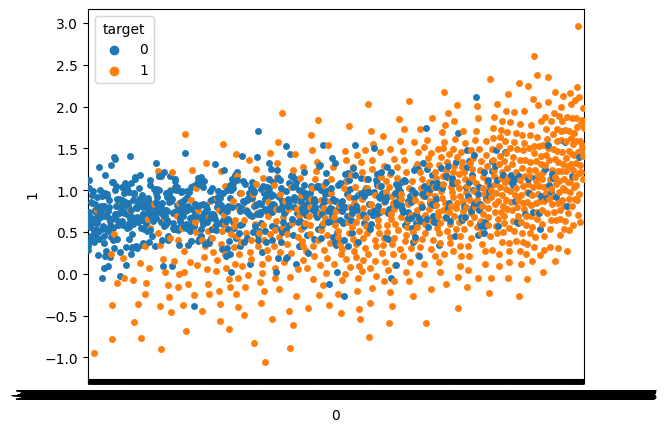

In [21]:
sns.swarmplot(data=df_sampled, x=0, y=1, hue='target')
plt.show()

#### Random remove

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
sampler = RandomUnderSampler()

In [25]:
X_resample, y_resample = sampler.fit_resample(X,y)

In [26]:
sorted(Counter(y_resample).items())

[(0, 815), (1, 815)]

In [27]:
df_sampled = pd.DataFrame(X_resample)
df_sampled['target'] = y_resample
df_sampled.head()

,0,1,target
0,-2.473300,0.569620,0
1,-1.655427,1.168923,0
2,-0.012906,0.989231,0
3,-0.841488,0.212281,0
4,1.169471,1.035011,0


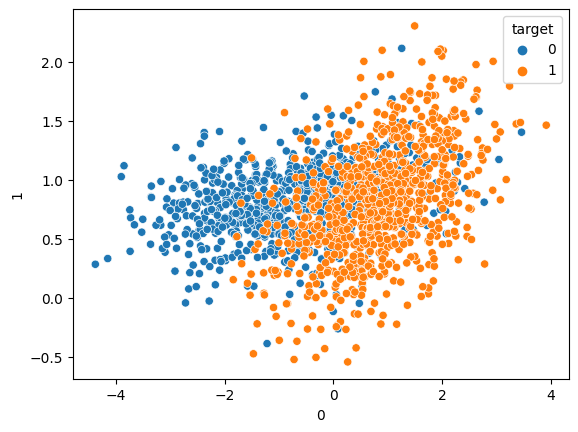

In [28]:
sns.scatterplot(data=df_sampled, x=0, y=1, hue='target')
plt.show()

### Resample of Sklearn

In [29]:
from sklearn.utils import resample

In [35]:
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]

In [36]:
df_0.shape, df_1.shape

((815, 3), (14185, 3))

In [37]:
df_1_resample = resample(df_1, replace=False, n_samples=df_0.shape[0], random_state=1)

In [39]:
df_1_resample = pd.concat([df_0,df_1_resample])

In [40]:
df_1_resample.target.value_counts()

0    815
1    815
Name: target, dtype: int64

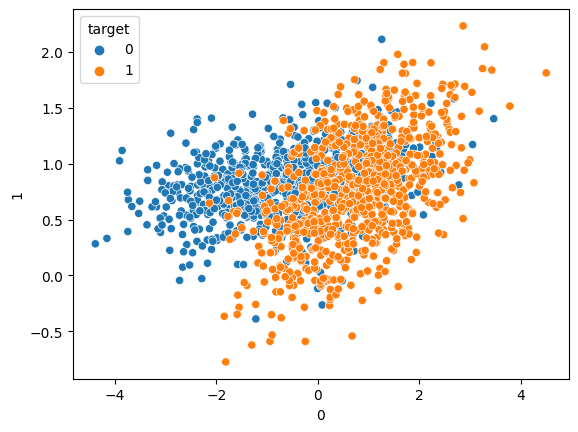

In [41]:
sns.scatterplot(data=df_1_resample, x=0, y=1, hue='target')
plt.show()